In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
df = pd.read_csv("/content/california_housing_test.csv")

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
df.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0
6,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0


In [ ]:
df.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2990,-118.23,34.09,49.0,1638.0,456.0,1500.0,430.0,2.6923,150000.0
2991,-117.17,34.28,13.0,4867.0,718.0,780.0,250.0,7.1997,253800.0
2992,-122.33,37.39,52.0,573.0,102.0,232.0,92.0,6.2263,500001.0
2993,-117.91,33.60,37.0,2088.0,510.0,673.0,390.0,5.1048,500001.0
2994,-117.93,33.86,35.0,931.0,181.0,516.0,174.0,5.5867,182500.0
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
2999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [ ]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
df.shape

(3000, 9)

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [ ]:
df.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False


In [ ]:
df.notnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
2995,True,True,True,True,True,True,True,True,True
2996,True,True,True,True,True,True,True,True,True
2997,True,True,True,True,True,True,True,True,True
2998,True,True,True,True,True,True,True,True,True


<BarContainer object of 3000 artists>

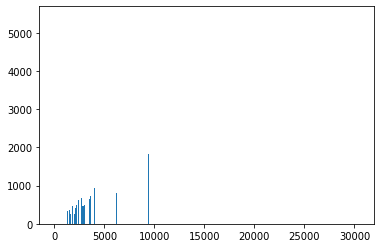

In [ ]:
plt.bar(df["total_rooms"],df["total_bedrooms"])

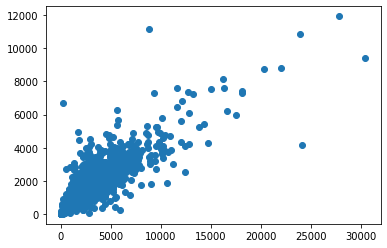

In [ ]:
plt.scatter(df["total_rooms"],df["population"])

(array([112., 143., 323., 376., 362., 340., 511., 306., 250., 277.]),
 array([ 1. ,  6.1, 11.2, 16.3, 21.4, 26.5, 31.6, 36.7, 41.8, 46.9, 52. ]),
 <BarContainer object of 10 artists>)

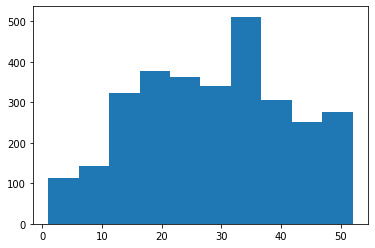

In [ ]:
plt.hist(df["housing_median_age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f25cb83fbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f25cb83ffd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f25cb83f910>,
 'medians': [<matplotlib.lines.Line2D at 0x7f25cb853550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f25cb8537f0>,
 'means': []}

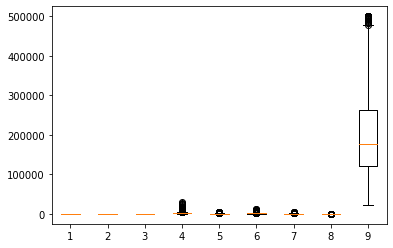

In [ ]:
plt.boxplot(df)

In [ ]:
X = df.drop('median_house_value', axis= 1)
Y = df['median_house_value']

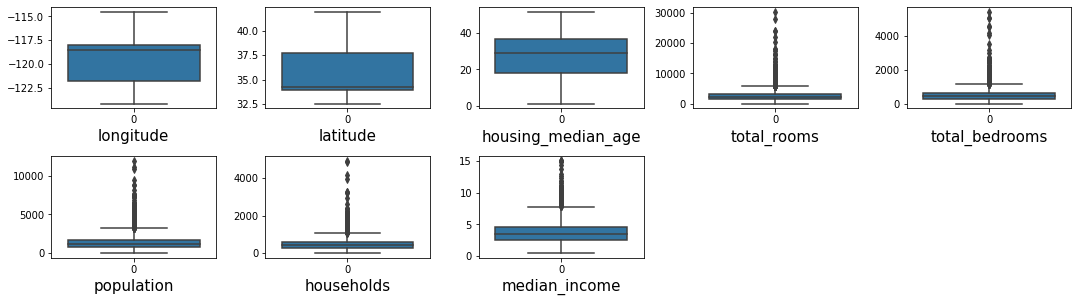

In [ ]:
plt.figure(figsize = (15,10))
plotnumber =1
for col in X.columns:
  if plotnumber <=15:
    ax = plt.subplot(5,5,plotnumber)
    sns.boxplot(X[col])
    plt.xlabel (col, fontsize =15)

    plotnumber += 1 
plt.tight_layout()
plt.show()

In [ ]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

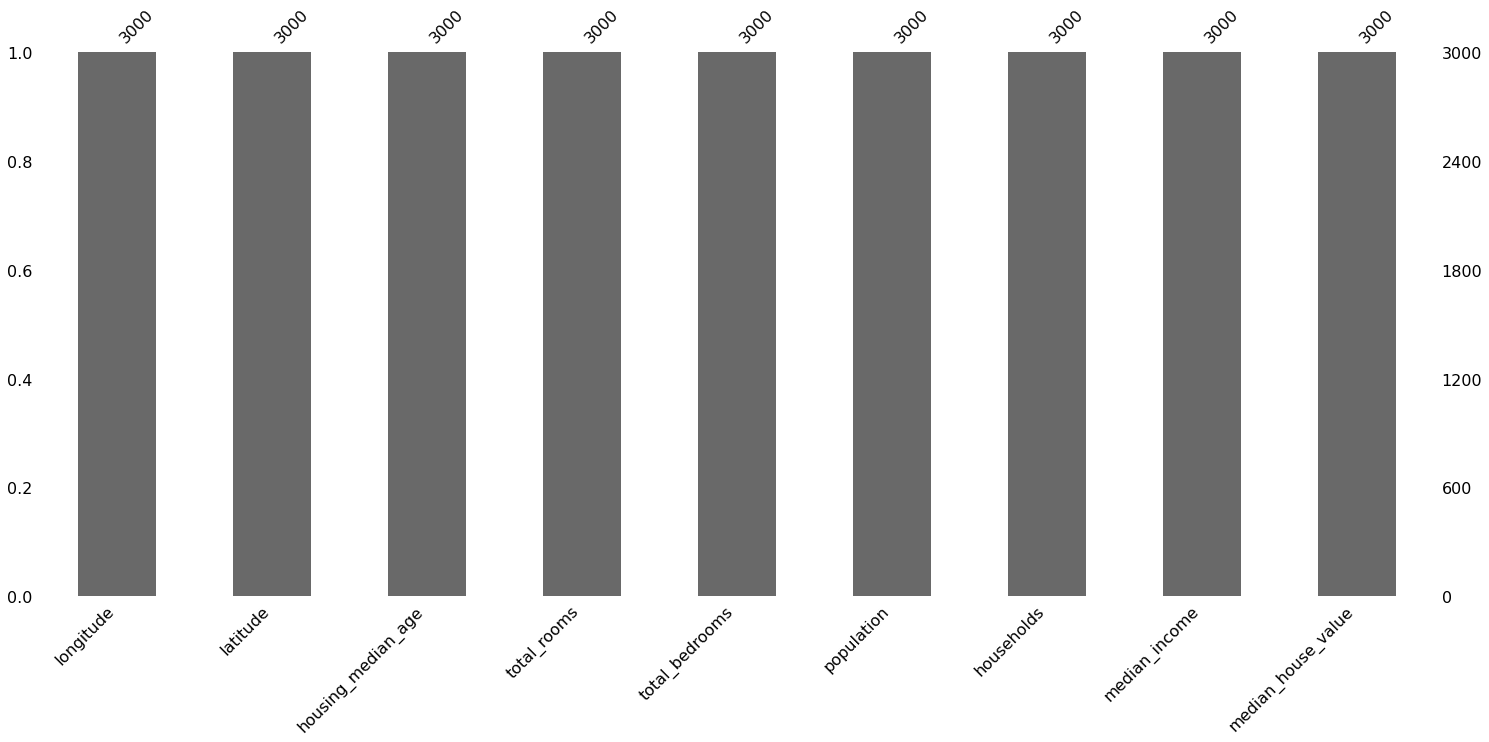

In [ ]:
import missingno as mn
mn.bar(df)
plt.show()

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5 ,random_state= 0)

In [ ]:
a = StandardScaler()
X_train = a.fit_transform(X_train)
X_test = a.transform(X_test)

In [ ]:
clf= DecisionTreeClassifier(criterion="entropy",random_state= 0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
cm= confusion_matrix(Y_test,Y_pred)
cm 

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  1, 24]])

In [ ]:
accuracy_score(Y_test,Y_pred)

0.016666666666666666

In [ ]:
from sklearn.tree import export_graphviz 
import graphviz

In [ ]:
graphviz.Source(export_graphviz(clf,feature_names=X.columns,filled=True))